In [29]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

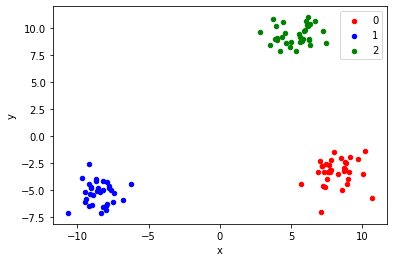

In [10]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.to_csv('data.csv')
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df[['x','y']], df['label'], random_state = 1337)
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 

In [28]:
accuracy = knn.score(X_test, y_test) 
print(accuracy) 

1.0


In [32]:
pickle.dump(knn, open('serialized/dummy_model.pkl', 'wb'))